# Working with Time Series

# 在時間序列上操作

> Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

Pandas的發展過程具有很強的金融領域背景，因此你可以預料的是，它一定包括一整套工具用於處理日期、時間和時間索引數據。日期和時間數據有如下幾類來源，我們會在本節中進行討論：


### Native Python dates and times: ``datetime`` and ``dateutil`` 
### 原生Python日期和時間

> Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

Python最基礎的日期和時間處理包就是`datetime`。如果加上第三方的`dateutil`模塊，你就能迅速的對日期和時間進行許多有用的操作了。例如，你可以手動創建一個`datetime`對象：

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
# dateutil model，你可以從許多不同的字符串格式中解析出datetime對象
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# 星期幾
date.strftime('%A')

'Saturday'

> In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

在上面的代碼中，我們使用了標準的字符串格式化編碼來打印日期（`"%A"`），你可以在[時間格式化](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)在線文檔中看到全部的說明。 Python的`datetime`在線文檔可以參考[datetime文檔](https://docs.python.org/3/library/datetime.html)。其他很有用的日期時間工具`dateutil`的文檔可在[dateutil在線文檔](http://labix.org/python-dateutil)找到。還有一個值得注意的第三方包是[`pytz`](http://pytz.sourceforge.net/)，用來處理最頭痛的時間序列數據：時區。

> The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

`datetime`和`dateutil`的強大在於它們靈活而易懂的語法：你可以使用這些對象內建的方法就可以完成幾乎所有你感興趣的時間操作。但是當對付大量的日期時間組成的數組時，它們就無法勝任了：就像Python的列表和NumPy的類型數組對比一樣，Python的日期時間對像在這種情況下就無法與編碼後的日期時間數組比較了。

### Typed arrays of times: NumPy's ``datetime64``

### 時間的類型數組：NumPy 的 `datetime64`

> The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

Python日期時間對象的弱點促使NumPy的開發團隊在NumPy中加入了優化的時間序列數據類型。 `datetime64`數據類型將日期時間編碼成了一個64位的整數，因此NumPy存儲日期時間的格式非常緊湊。 `datetime64`規定了非常明確的輸入格式：

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
# vectorized operations
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

> Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large
(we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)).

因為NumPy數組中所有元素都具有統一的`datetime64`類型，上面的向量化操作將會比我們使用Python的`datetime`對象高效許多，特別是當數組變得很大的情況下（我們在[使用Numpy計算：通用函數](02.03-Computation-on-arrays-ufuncs.ipynb)中詳細介紹過）。

> One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

關於`datetime64`和`timedelta64`對像還有一個細節就是它們都是在*基本時間單位*之上構建的。因為`datetime64`被限制在64位精度上，因此它可被編碼的時間範圍就是$2^{64}$乘以相應的時間單位。換言之，`datetime64`需要在*時間精度*和*最大時間間隔*之間進行取捨。

> For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input

例如，如果時間單位是納秒，`datetime64`類型能夠編碼的時間範圍就是$2^{64}$納秒，不到600年。 NumPy可以自動從輸入推斷需要的時間精度（單位）

In [6]:
np.datetime64('2015-07-04')  # day-based
np.datetime64('2015-07-04 12:00') # min-based
np.datetime64('2015-07-04 12:59:59.50', 'ns')  # ns-based

numpy.datetime64('2015-07-04T12:59:59.500000000')

> The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

下面這張表，來自[NumPy datetime64類型在線文檔](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)，列出了可用的時間單位代碼以及其相應的時間範圍限制：

> For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

對於我們目前真實世界的數據來說，一個合適的默認值可以是`datetime64[ns]`，因為它既能包含現代的時間範圍，也能提供相當高的時間精度。

> Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.
More information can be found in [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

最後，還要提醒的是，雖然`datetime64`數據類型解決了Python內建`datetime`類型的低效問題，但是它卻缺少很多`datetime`特別是`dateutil`對象提供的很方便的方法。你可以在[NumPy的datetime64在線文檔](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)中查閱更多相關內容。



|代碼    | 含義     | 時間範圍 (相對) | 時間範圍 (絕對)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | 年	       | ± 9.2e18 年       | [公元前9.2e18 至 公元後9.2e18] |
| ``M``  | 月       | ± 7.6e17 年       | [公元前7.6e17 至 公元後7.6e17] |
| ``W``  | 星期	       | ± 1.7e17 年       | [公元前1.7e17 至 公元後1.7e17] |
| ``D``  | 日         | ± 2.5e16 年       | [公元前2.5e16 至 公元後2.5e16] |
| ``h``  | 小時        | ± 1.0e15 年       | [公元前1.0e15 至 公元後1.0e15] |
| ``m``  | 分鐘      | ± 1.7e13 年       | [公元前1.7e13 至 公元後1.7e13] |
| ``s``  | 秒      | ± 2.9e12 年       | [公元前2.9e9 至 公元後2.9e9]  |
| ``ms`` | 毫秒 | ± 2.9e9 年        | [公元前2.9e6 至 公元後2.9e6]  |
| ``us`` | 微秒 | ± 2.9e6 年        | [公元前290301 至 公元後294241] |
| ``ns`` | 納秒  | ± 292 年          | [公元後1678 至 公元後2262]    |
| ``ps`` | 皮秒  | ± 106 天           | [公元後1969 至 公元後1970]    |
| ``fs`` | 飛秒 | ± 2.6 小時          | [公元後1969 至 公元後1970]    |
| ``as`` | 阿秒  | ± 9.2 秒        | [公元後1969 至 公元後1970]    |

### Dates and times in pandas: best of both worlds

### Pandas中的日期和時間：兼得所長

> Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

Pandas在剛才介紹的那些工具的基礎上構建了`Timestamp`對象，既包含了`datetime`和`dateutil`的簡單易用，又吸收了`numpy.datetime64`的高效和向量化操作優點。將這些`Timestamp`對象組合起來之後，Pandas就能構建一個`DatetimeIndex`，能在`Series`或`DataFrame`當中對數據進行索引查找；我們下面會看到很多有關的例子。

> For example, we can use Pandas tools to repeat the demonstration from above.
We can parse a flexibly formatted string date, and use format codes to output the day of the week:

例如，我們使用Pandas工具可以重複上面的例子。我們可以將一個靈活表示時間的字符串解析成日期時間對象，然後用時間格式化代碼進行格式化輸出星期幾：

In [7]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [8]:
date.strftime('%A')

'Saturday'

In [9]:
# vectorized operations 
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

## Pandas時間序列：使用時間索引

> Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

對於Pandas時間序列工具來說，*使用時間戳來索引數據*，才是真正吸引人的地方。例如，我們可以創建一個`Series`對象具有時間索引標籤：

In [10]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

> Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

這樣我們就有了一個`Series`數據，我們可以將任何`Series`索引的方法應用到這個對像上，我們可以傳入參數值，Pandas會自動轉換為日期時間進行操作：

In [11]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [12]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

## Pandas時間序列數據結構

> This section will introduce the fundamental Pandas data structures for working with time series data:

這部分內容會介紹Pandas在處理時間序列數據時候使用的基本數據結構：

- 對於*時間戳*，Pandas提供了`Timestamp`類型。正如上面所述，它可以作為Python原生`datetime`類型的替代，但是它是構建在`numpy.datetime64`數據類型之上的。對應的索引結構是`DatetimeIndex`。
- 對於*時間週期*，Pandas提供了`Period`類型。它是在`numpy.datetime64`的基礎上編碼了一個固定週期間隔的時間。對應的索引結構是`PeriodIndex`。
- 對於*時間差*或*持續時間*，Pandas提供了`Timedelta`類型。構建於`numpy.timedelta64`之上，是Python原生`datetime.timedelta`類型的高性能替代。對應的索引結構是`TimedeltaIndex`。

> The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

上述這些日期時間對像中最基礎的是`Timestamp`和`DatetimeIndex`對象。雖然這些對象可以直接被創建，但是更通用的做法是使用`pd.to_datetime()`函數，該函數可以將多種格式的字符串解析成日期時間。將一個日期時間傳遞給`pd.to_datetime()`會得到一個`Timestamp`對象；將一系列的日期時間傳遞過去會得到一個`DatetimeIndex`對象：

In [13]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [14]:
#使用`'D'`來指定頻率為天
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [15]:
#TimedeltaIndex對象可以通過日期時間相減來創建
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

### 規則序列：`pd.date_range()`

> To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

Pandas提供了三個函數來創建規則的日期時間序列，`pd.date_range()`來創建時間戳的序列，`pd.period_range()`來創建週期的序列，`pd.timedelta_range()`來創建時間差的序列。我們都已經學習過Python的`range()`和NumPy的`arange()`了，它們接受開始點、結束點和可選的步長參數來創建序列。同樣，`pd.date_range()`接受開始日期時間、結束日期時間和可選的周期碼來創建日期時間的規則序列。默認週期為一天：

In [16]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
#通過開始日期時間和一個持續值來指定
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
#時間的間隔可以通過指定freq頻率參數來修改，否則默認為天D
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

> To create regular sequences of ``Period`` or ``Timedelta`` values, the very similar ``pd.period_range()`` and ``pd.timedelta_range()`` functions are useful.
Here are some monthly periods:

要創建`Period`或`Timedelta`對象，可以類似的調用`pd.period_range()`和`pd.timedelta_range()`函數。下面是以月為單位的時間週期序列：

In [19]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [20]:
#Hour
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

## 頻率和偏移值

> Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

要使用Pandas時間序列工具，我們需要理解頻率和時間偏移值的概念。就像前面我們看到的`D`代表天和`H`代表小時一樣，我們可以使用這類符號碼指定需要的頻率間隔。下表總結了主要的頻率碼：

| 碼   | 說明         | 碼   | 說明          |
|--------|---------------------|--------|----------------------|
| ``D``  | 自然日        | ``B``  | 工作日        |
| ``W``  | 週              |        |                      |
| ``M``  | 自然日月末           | ``BM`` | 工作日月末   |
| ``Q``  | 自然日季末         | ``BQ`` | 工作日季末 |
| ``A``  | 自然日年末            | ``BA`` | 工作日年末    |
| ``H``  | 自然小時               | ``BH`` | 工作小時       |
| ``T``  | 分鐘             |        |                      |
| ``S``  | 秒             |        |                      |
| ``L``  | 毫秒         |        |                      |
| ``U``  | 微秒        |        |                      |
| ``N``  | 納秒         |        |                      |

> The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:

上面的月、季度和年都代表著該時間週期的結束時間。如果在這些碼後面加上`S`後綴，則代表這些時間週期的起始時間：

| 碼    | 說明            || 碼    | 說明            |
|---------|------------------------||---------|------------------------|
| ``MS``  | 自然日月初            ||``BMS``  | 工作日月初   |
| ``QS``  | 自然日季初          ||``BQS``  | 工作日季初 |
| ``AS``  | 自然日年初             ||``BAS``  | 工作日年初    |

> Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

並且你可以通過在季度或者年的符號碼後面添加三個字母的月份縮寫來指定週期進行分隔的月份：

- ``Q-JAN``、``BQ-FEB``、``QS-MAR``、``BQS-APR``等
- ``A-JAN``、``BA-FEB``、``AS-MAR``、``BAS-APR``等

> In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

同樣，每週的分隔日也可以通過在周符號碼後面添加三個字母的星期幾縮寫來指定：

- ``W-SUN``、``W-MON``、``W-TUE``、``W-WED``等

> On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

在此之上，符號碼還可以進行組合用來代表其他的頻率。例如要表示2小時30分鐘的頻率，我們可以通過將小時（`H`）和分鐘（`T`）的符號碼進行組合得到：

In [21]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

> All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

上述的這些短的符號碼實際上是Pandas時間序列偏移值的對象實例的別名，你可以在`pd.tseries.offsets`模塊中找到這些偏移值實例。例如，我們也可以通過一個偏移值對象實例來創建時間序列：

In [22]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

## 重新取樣、移動和窗口

> The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

使用日期和時間作為索引來直觀的組織和訪問數據的能力，是Pandas時間序列工具的重要功能。前面介紹過的索引的那些通用優點（自動對齊，直觀的數據切片和訪問等）依然有效，而且Pandas提供了許多額外的時間序列相關操作。

> We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

我們會在這裡介紹其中的一些，使用股票價格數據作為例子。因為Pandas是在金融背景基礎上發展而來的，因此它具有一些特別的金融數據相關工具。例如，`pandas-datareader`包（可以通過`conda install pandas-datareader`進行安裝）可以被用來從許多可用的數據源導入金融數據，包括Yahoo金融，Google金融和其他。

In [23]:
!pip install pandas-datareader

In [24]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


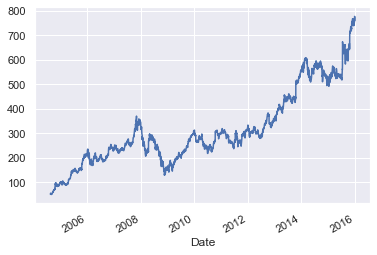

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog = goog['Close']
goog.plot();

### Resampling and converting frequencies

### 重新採樣和改變頻率

> One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

對於時間序列數據來說有一個很普遍的需求是對數據根據更高或更低的頻率進行重新取樣。這可以通過`resample()`方法或更簡單的`asfreq()`方法來實現。兩者的主要區別在於`resample()`主要進行*數據聚合*操作，而`asfreq()`方法主要進行*數據選擇*操作。

> Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

觀察一下谷歌的收市價，讓我們來比較一下使用兩者對數據進行更低頻率來採樣的情況。下面我們對數據進行每個工作日年度進行重新取樣：

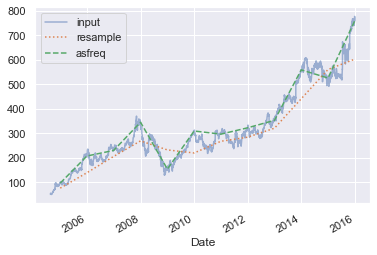

In [26]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

> Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

注意這裡的區別：在每個點，`resample`返回了*這一個年度*的平均值，而`asfreq`返回了*年末的收市值*。

> For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

對於採用更高頻率的取樣來說，`resample()`和`asfreq()`方法大體上是相同的，雖然resample有著更多的參數。在這個例子中，默認的方式是將更高頻率的採樣點填充為空值，即NA值。就像之前介紹過的`pd.fillna()`函數那樣，`asfreq()`方法接受一個`method`參數來指定值以那種方式插入。下面，我們將原本數據的工作日頻率擴張為自然日頻率（即包括週末）：

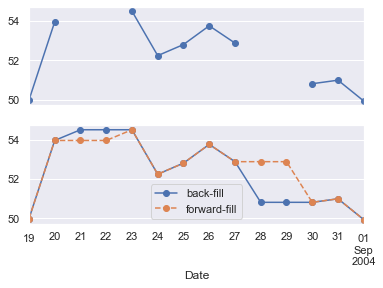

In [27]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

> The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

上面的子圖表是默認的：非工作日的數據點被填充為NA值，因此在圖中沒有顯示。下面的子圖表展示了兩種不同填充方法的差別：前向填充和後向填充。

### Time-shifts

### 時間移動

> Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

另一個普遍的時間序列相關操作是移動時間。 Pandas有兩個很接近的方法來實現時間的移動：`shift()`和`tshift`。簡單來說，`shift()`*移動的是數據*，而`tshift()`*移動的是時間索引*。兩個方法使用的移動參數都是當前頻率的倍數。

> Here we will both ``shift()`` and ``tshift()`` by 900 days; 

下面我們使用`shift()`和`tshift()`方法將數據和時間索引移動900天：

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6959/1436032587.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2]) # 時間移動900天


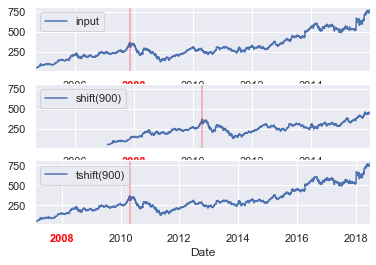

In [28]:
fig, ax = plt.subplots(3, sharey=True)

# 在數據上應用一個頻率
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0]) # 畫出原圖
goog.shift(900).plot(ax=ax[1]) # 數據移動900天
goog.tshift(900).plot(ax=ax[2]) # 時間移動900天

# 圖例和標籤
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

> We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

上例中，我們看到`shift(900)`將*數據*向前移動了900天，導致部分數據都超過了圖表的右側範圍（左側新出現的值被填充為NA值），而`tshift(900)`將*時間*向後移動了900天。

> A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

這種時間移動的常見應用場景是計算同比時間段的差值。例如，我們可以將數據時間向前移動365天來計算谷歌股票的年投資回報率：

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6959/2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


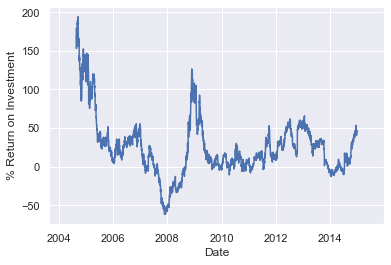

In [29]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

### 滾動窗口

> Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation (see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
This rolling view makes available a number of aggregation operations by default.

滾動窗口統計是第三種Pandas時間序列相關的普遍操作。這個統計任務可以通過`Series`和`DataFrame`對象的`rolling()`方法來實現，這個方法的返回值類似與我們之前看到的`groupby`操作（參見[聚合與分組](03.08-Aggregation-and-Grouping.ipynb)）。在該滾動窗口視圖上可以進行一系列的聚合操作。

> For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

例如，下面是對谷歌股票價格在365個記錄中居中求平均值和標準差的結果：

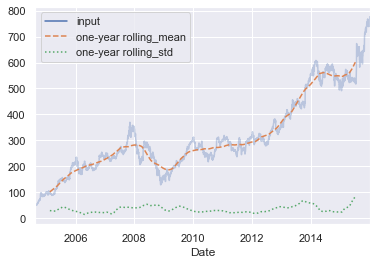

In [30]:
rolling = goog.rolling(365, center=True) # 對365個交易日的收市價進行滾動窗口居中

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(), # 平均值Series
                     'one-year rolling_std': rolling.std()}) # 標準差Series
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Example: Visualizing Seattle Bicycle Counts

## 例子：西雅圖自行車統計可視化

> As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

最後作為一個更深入的處理時間序列數據例子，我們來看一下西雅圖費利蒙橋的自行車數量統計。該數據集來源自一個自動自行車的計數器，在2012年末安裝上線，它們能夠感應到橋上東西雙向通過的自行車並進行計數。按照小時頻率採樣的自行車數量計數數據集可以在[這個鏈接處](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)直接下載。

In [31]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

> Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

下載了數據集後，我們就可以用Pandas將CSV文件的內容導入成`DataFrame`對象。我們指定使用日期作為行索引，還可以通過`parse_dates`參數要求Pandas自動幫我們轉換日期時間格式：

In [32]:
data = pd.read_csv('input/pd-bridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [33]:
# data.columns = ['West', 'East']
# data['Total'] = data.eval('West + East')
data.columns = ['Total', 'East', 'West']
data.dropna().describe()

,Total,East,West
count,10771.000000,10771.000000,10771.000000
mean,99.713861,51.416489,48.297373
std,120.397155,63.867062,67.568734
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,57.000000,29.000000,26.000000
75%,134.000000,69.000000,60.000000
max,831.000000,626.000000,593.000000


### Visualizing the data

### 可視化數據

> We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

我們可以通過將數據可視化成圖表來更好的觀察分析數據集。首先我們來展示原始數據圖表：

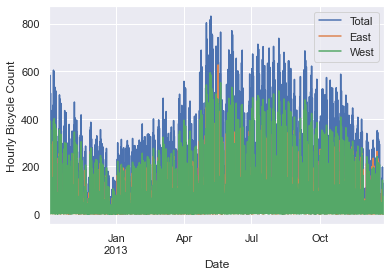

In [34]:
%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count');

> The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

約25000小時的樣本數據畫在圖中非常擁擠，我們很觀察到什麼有意義的結果。我們可以通過重新取樣，降低頻率來獲得更粗顆粒度的圖像。如下面按照每週來重新取樣：

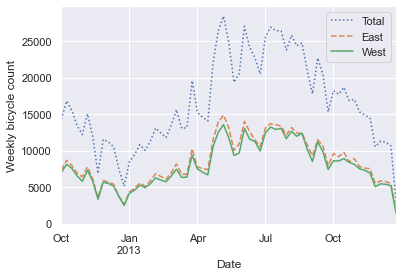

In [35]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

> This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

上圖向我們展示非常有趣的季節性趨勢：你應該已經預料到，人們在夏季會比冬季更多的騎自行車，即使在一個季節中，每周自行車的數量也有很大起伏（這主要是由於天氣造成的；我們會在[深入：線性回歸](05.06-Linear-Regression.ipynb)中會更加深入的討論）。

> Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

還有一個很方便的聚合操作就是滾動平均值，使用`pd.rolling_mean()`函數。下面我們進行30天的滾動平均，窗口居中進行統計：

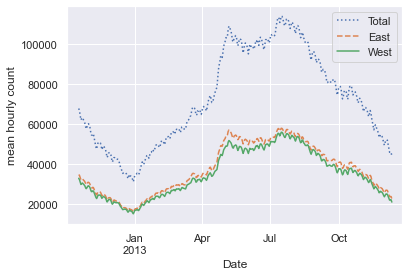

In [36]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

> The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

上圖結果中的鋸齒圖案產生的原因是窗口邊緣的硬切割造成的。我們可以使用不同的窗口類型來獲得更加平滑的結果，例如高斯窗口。下面的代碼製定了窗口的寬度（50天）和窗口內的高斯寬度（10天）：

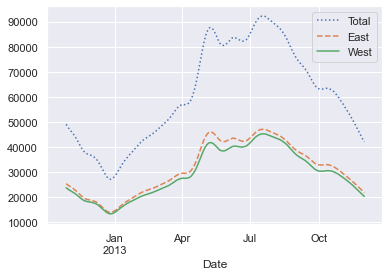

In [37]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

### 挖掘數據

> While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

雖然上面的光滑折線圖展示了大體的數據趨勢情況，但是很多有趣的結構依然沒有展現出來。例如，我們希望對每天不同時段的平均交通情況進行統計，我們可以使用[聚合與分組](03.08-Aggregation-and-Grouping.ipynb)中介紹過的GroupBy功能：

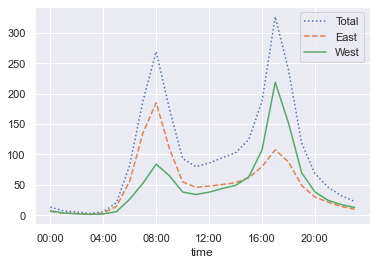

In [38]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) # 將24小時分為每4個小時一段展示
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

> The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

小時交通數據圖展現了明顯的雙峰構造，峰值大約出現在早上8:00和下午5:00。這顯然就是大橋在通勤時間交通繁忙的最好證據。再注意到東西雙向峰值不同，證明了早上通勤時間多數的交通流量是從東至西（往西雅圖城中心方向），而下午通勤時間多數的交通流量是從西至東（離開西雅圖城中心方向）。

> We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

我們可能也會很好奇一周中每天的平均交通情況。當然，還是通過簡單的GroupBy就能實現：

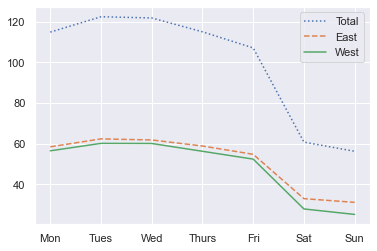

In [39]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

> This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

上圖清晰的展示了工作日和休息日的區別，週一到週五的流量基本上達到週六日的兩倍。

> With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

有了上面兩個分析的基礎，讓我們來進行一個更加複雜的分組查看工作日和休息日按照小時交通流量的情況。我們首先使用`np.where`將工作日和休息日分開：

In [40]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

> Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

然後我們使用將在[多個子圖表](04.08-Multiple-Subplots.ipynb)中介紹的方法將兩個子圖表並排展示：

譯者註：因為`DataFrame.ix`已經不推薦使用，因此下面代碼中的索引符改成了loc。

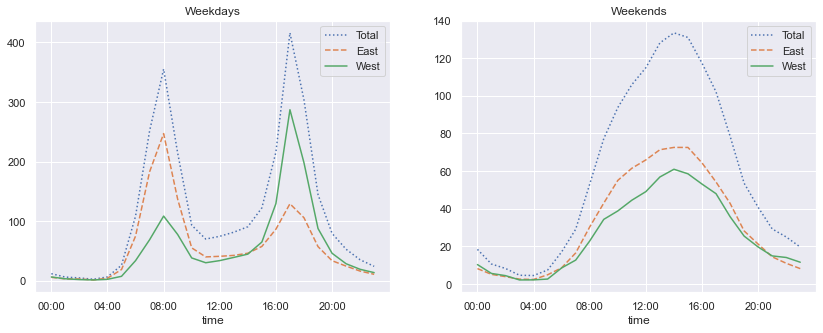

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

> The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

這個結果非常有趣：我們可以在工作日看到明顯的雙峰構造，但是在休息日就只能看到一個峰。如果我們繼續挖掘下去，這個數據集還有更多有趣的結構可以被發現，可以分析天氣、氣溫、每年的不同時間以及其他因素是如何影響居民的通勤方式的；要深入討論，可以參見作者的博客文章["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)，裡面使用了這個數據集的子集。我們也會在[深入：線性回歸](05.06-Linear-Regression.ipynb)小節中再次遇到這個數據集。

## Timedelta

In [42]:
pd.Timedelta('2 days')
pd.Timedelta('-4 days')
pd.Timedelta(3, unit ='h')
pd.Timedelta(days = 2, minutes = 40)
pd.Timedelta(days = 4, minutes = 30, seconds=6,  milliseconds=10, microseconds=10, nanoseconds=12)

Timedelta('4 days 00:30:06.010010012')

In [43]:
pd.Timedelta(days = 1, minutes = 50) + pd.Timedelta(hours = 3, minutes = 20)

Timedelta('1 days 04:10:00')

In [44]:
td = pd.TimedeltaIndex(['2 days', '-1 days', '3 days 5 hours'])
td

TimedeltaIndex(['2 days 00:00:00', '-1 days +00:00:00', '3 days 05:00:00'], dtype='timedelta64[ns]', freq=None)

In [45]:
td.days
td.seconds
td.components
td.view
td.total_seconds()

Float64Index([172800.0, -86400.0, 277200.0], dtype='float64')

In [46]:
pd.datetime.now()-pd.Timedelta(days=4)

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6959/2907380045.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now()-pd.Timedelta(days=4)


datetime.datetime(2022, 5, 17, 1, 21, 17, 598863)

## Timedelta.Index

In [47]:
# Create the TimedeltaIndex object
tidx = pd.TimedeltaIndex(data =['1 days 02:00:00', 
                                '1 days 06:05:01.000030'])
tidx

TimedeltaIndex(['1 days 02:00:00', '1 days 06:05:01.000030'], dtype='timedelta64[ns]', freq=None)

In [48]:
tidx.days

Int64Index([1, 1], dtype='int64')

In [49]:
# creating PeriodIndex
webinar_date = pd.period_range('2021-06-07', periods= 6, freq = 'M')
course = ['ANN', 'CNN', 'Python','SQL', 'NLP', 'ML']
df = pd.DataFrame(course, index = webinar_date, columns = ['Course'])
df

,Course
2021-06,ANN
2021-07,CNN
2021-08,Python
2021-09,SQL
2021-10,NLP
2021-11,ML


In [50]:
# creating period index representing all monthly boundaries in 2012
pi_2012 = pd.period_range('1/1/2012', periods = 12, freq = 'M')
pi_2012

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'],
            dtype='period[M]')

In [51]:
import pandas as pd
sr = pd.Series(['2012-10-21 09:30', '2019-7-18 12:30', '2008-02-2 10:30',
               '2010-4-22 09:25', '2019-11-8 02:22'])
# Convert the underlying data to datetime 
s = pd.to_datetime(sr)
s

0   2012-10-21 09:30:00
1   2019-07-18 12:30:00
2   2008-02-02 10:30:00
3   2010-04-22 09:25:00
4   2019-11-08 02:22:00
dtype: datetime64[ns]

In [52]:
s.dt.date
s.dt.year
s.dt.day
s.dt.month
s.dt.weekofyear
s.dt.quarter

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6959/847431616.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  s.dt.weekofyear


0    4
1    3
2    1
3    2
4    4
dtype: int64

In [53]:
import pandas as pd
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [54]:
# changing to date time
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [55]:
print(pd.to_datetime('13000101', format='%Y%m%d', errors='ignore'))

1300-01-01 00:00:00


## Period

In [56]:
# creating a period of time
p = pd.Period('2020-9-4')
p

Period('2020-09-04', 'D')

In [57]:
p1 = pd.Period('2020-9-4', freq = 'M')
p1

Period('2020-09', 'M')

In [58]:
period_sample = pd.period_range(start = '3/5/2020', end = '13/5/2021', freq = 'M')
period_sample

PeriodIndex(['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05'],
            dtype='period[M]')

## datetime
NumPy cannot natively represent timezone-aware datetimes. pandas supports this with the arrays.DatetimeArray extension array, which can hold timezone-naive or timezone-aware values.

Timestamp, a subclass of ``datetime.datetime``, is pandas’ scalar type for timezone-naive or timezone-aware datetime data.

In [59]:
arr = pd.Timestamp('2020-9-12', tz = 'Europe/Berlin')
arr

Timestamp('2020-09-12 00:00:00+0200', tz='Europe/Berlin')

In [60]:
arr_timestamp = pd.Timestamp('2010-8-22')
arr_timestamp

Timestamp('2010-08-22 00:00:00')

In [61]:
arr_timestamp = arr_timestamp.tz_localize('US/Central')
arr_timestamp

Timestamp('2010-08-22 00:00:00-0500', tz='US/Central')

In [62]:
arr.day
arr.dayofyear  # returns day of year
arr.dayofweek  # returns day of week

5

## Handling Time Series Data

In [63]:
# creating Time Series data
time_series = pd.date_range('4/1/2021',periods = 20)
df = pd.DataFrame({'date':time_series})
df.head()

,date
0,2021-04-01
1,2021-04-02
2,2021-04-03
3,2021-04-04
4,2021-04-05


In [64]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df.head()

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6959/1745261701.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,date,year,month,week
0,2021-04-01,2021,4,13
1,2021-04-02,2021,4,13
2,2021-04-03,2021,4,13
3,2021-04-04,2021,4,13
4,2021-04-05,2021,4,14


In [65]:
df['date'].dt.isocalendar().week
df['date'].dt.dayofweek

0     3
1     4
2     5
3     6
4     0
5     1
6     2
7     3
8     4
9     5
10    6
11    0
12    1
13    2
14    3
15    4
16    5
17    6
18    0
19    1
Name: date, dtype: int64

## Pandas-Offsets 
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [66]:
import pandas as pd
rng = pd.date_range("2012-01-01", "2012-01-04")
rng

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04'], dtype='datetime64[ns]', freq='D')

In [67]:
rng + pd.DateOffset(months=2)

DatetimeIndex(['2012-03-01', '2012-03-02', '2012-03-03', '2012-03-04'], dtype='datetime64[ns]', freq=None)

In [68]:
rng - pd.DateOffset(months=2)

DatetimeIndex(['2011-11-01', '2011-11-02', '2011-11-03', '2011-11-04'], dtype='datetime64[ns]', freq=None)

In [69]:
rng - pd.offsets.Day(2)

DatetimeIndex(['2011-12-30', '2011-12-31', '2012-01-01', '2012-01-02'], dtype='datetime64[ns]', freq='D')

<!--NAVIGATION-->
< [向量化的字符串操作](03.10-Working-With-Strings.ipynb) | [目录](Index.ipynb) | [高性能Pandas: eval() 和 query()](03.12-Performance-Eval-and-Query.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
